In [3]:
import yfinance as yf
import pandas as pd

# Tentukan simbol saham dan periode data
symbol = "BTC"
start_date = "2023-01-01"
end_date = "2023-12-31"

# Mengunduh data historis
data = yf.download(symbol, start=start_date, end=end_date).reset_index(drop=True)

# Tampilkan beberapa baris data untuk memastikan data berhasil diunduh
print(data.head())

[*********************100%%**********************]  1 of 1 completed

        Open       High        Low      Close  Adj Close  Volume
0  90.591003  90.618797  90.570000  90.618797  87.998299    1715
1  90.879204  90.879204  90.879204  90.879204  88.251175     103
2  90.751404  90.751404  90.751404  90.751404  88.127068      11
3  90.919998  91.408302  90.919998  91.408302  88.764977   11299
4  91.429001  91.599998  91.429001  91.599998  88.951126    3790


In [6]:
def identify_supply_demand_zones(df, window=20):
    df['max_price'] = df['High'].rolling(window=window).max()
    df['min_price'] = df['Low'].rolling(window=window).min()

    supply_zones = []
    demand_zones = []

    for i in range(window, len(df)):
        if df['High'][i] >= df['max_price'][i-window:i].max():
            supply_zones.append((df.index[i], df['High'][i]))
        if df['Low'][i] <= df['min_price'][i-window:i].min():
            demand_zones.append((df.index[i], df['Low'][i]))

    return supply_zones, demand_zones

supply_zones, demand_zones = identify_supply_demand_zones(data)

In [9]:
def identify_fvg(df):
    fvg_zones = []
    for i in range(1, len(df)-1):
        if df['Low'][i] > df['High'][i-1] and df['High'][i] < df['Low'][i+1]:
            fvg_zones.append((df.index[i], df['Low'][i], df['High'][i]))
    return fvg_zones

fvg_zones = identify_fvg(data)

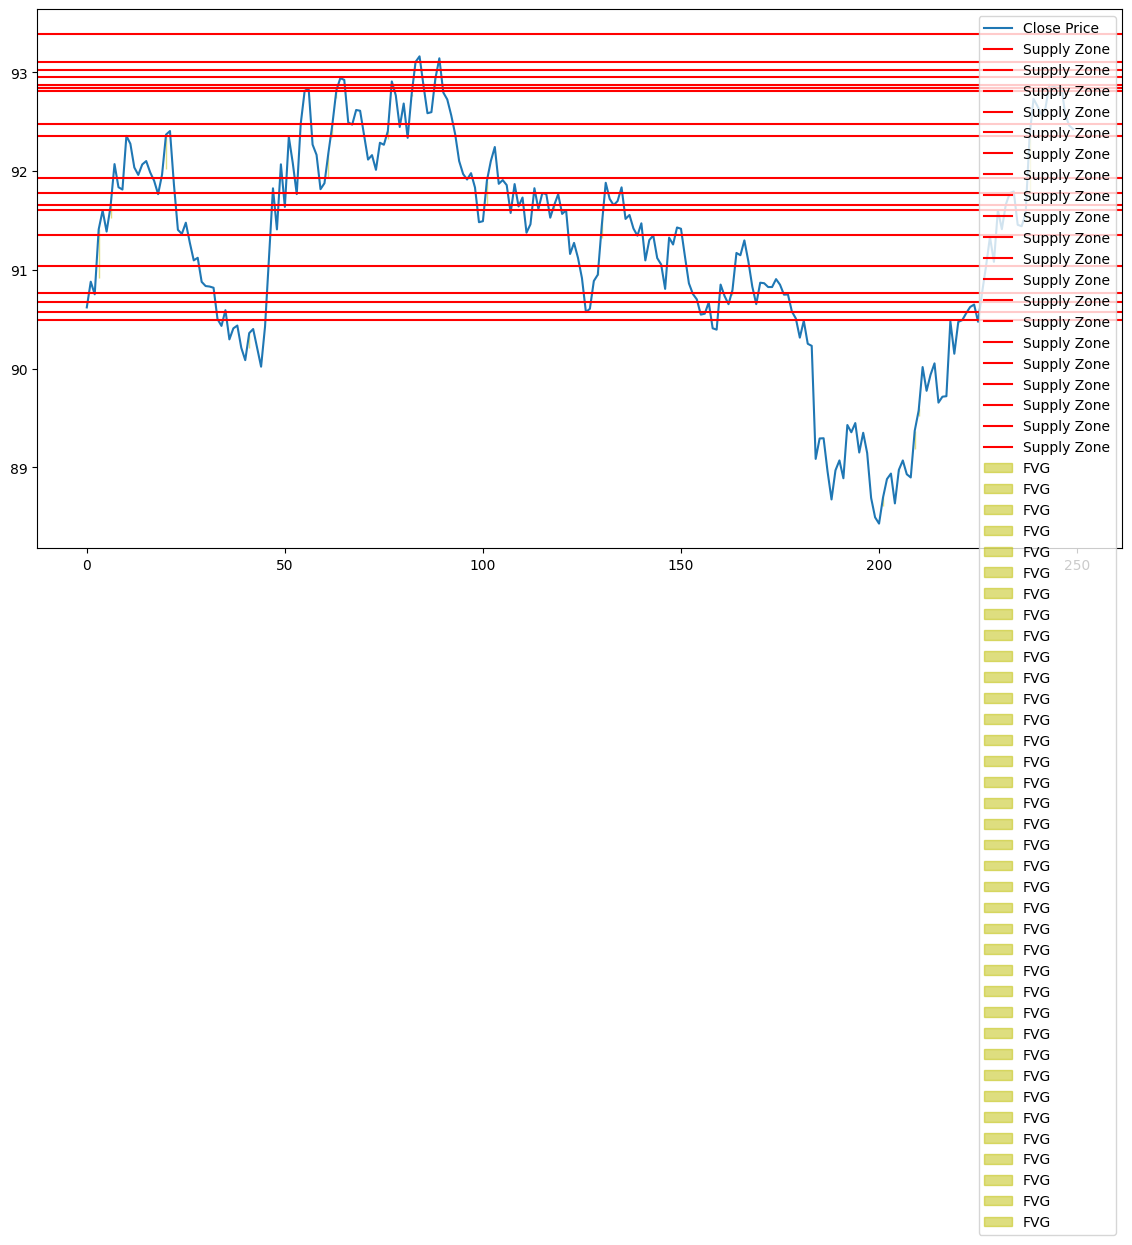

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price')
for zone in supply_zones:
    plt.axhline(y=zone[1], color='r', linestyle='-', label='Supply Zone')
# for zone in demand_zones:
#     plt.axhline(y=zone[1], color='g', linestyle='-', label='Demand Zone')
for zone in fvg_zones:
    plt.fill_betweenx([zone[1], zone[2]], zone[0], zone[0], color='y', alpha=0.5, label='FVG')

plt.legend()
plt.show()